permute_cluster_label

pandasといえばpandasの内容だし、scikit-learnといえばscikit-learnの内容だし、どっちに分類するか悩ましいな。  
クラスタリングの見栄えを調整する話なので、scikit-learnに分類しておこう。

In [1]:
import pandas as pd
import seaborn as sns
pd.options.display.notebook_repr_html = False  # jupyter notebook上での出力形式を制御するために書いています。無くても動きます。

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# 動作環境の確認
print(pd.__version__)
# print(np.__version__)

1.1.2


In [3]:
random_state = 123

In [4]:
center_coordinates = [[2, 1], [1, 2], [4, 4]] 
n_clusters = len(center_coordinates)
X, y = make_blobs(n_samples=30*n_clusters, centers=center_coordinates, n_features=2, cluster_std=0.3, random_state=random_state)

In [5]:
df = pd.DataFrame(data=X, columns=['x1', 'x2'])

In [6]:
# sns.scatterplot(x=0, y=1, data=X)
# なんか見慣れないエラーが出てくる

<AxesSubplot:xlabel='x1', ylabel='x2'>

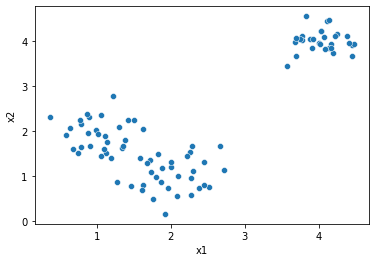

In [7]:
sns.scatterplot(x='x1', y='x2', data=df)

In [8]:
y_pred = KMeans(n_clusters=n_clusters, random_state=random_state).fit_predict(df)

In [9]:
df['cluster_index_pred'] =  y_pred

In [10]:
df.head()

         x1        x2  cluster_index_pred
0  1.719250  1.352749                   2
1  0.780261  1.636243                   0
2  2.379781  0.739978                   2
3  1.587823  1.392486                   2
4  1.054311  2.353359                   0

<AxesSubplot:xlabel='x1', ylabel='x2'>

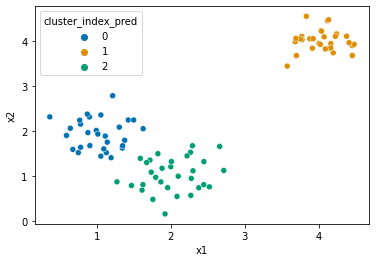

In [11]:
sns.scatterplot(x='x1', y='x2', hue='cluster_index_pred', data=df, palette='colorblind')

<AxesSubplot:xlabel='x1', ylabel='x2'>

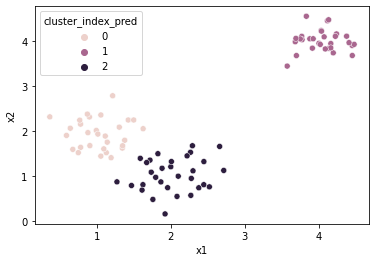

In [12]:
sns.scatterplot(x='x1', y='x2', hue='cluster_index_pred', data=df)
# paletteを指定しないと色の変化が連続的になるので説明に合致するかもね

上の図の通り、クラスタリングアルゴリズムがラベルを振る順番はバラバラである。